In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
!git clone https://github.com/batwhite/Data-Science-Project.git

Cloning into 'Data-Science-Project'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 0), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [5]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#for matplotlib


%matplotlib inline



In [6]:
path_transaction = "/content/Data-Science-Project/Data/QVI_transaction_data.xlsx"
path_trends = "/content/Data-Science-Project/Data/QVI_purchase_behaviour.csv"
trends_data = pd.read_csv(path_trends)
trends_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


,counts,freqs
categories,,
MIDAGE SINGLES/COUPLES,7275,0.100156
NEW FAMILIES,2549,0.035092
OLDER FAMILIES,9780,0.134642
OLDER SINGLES/COUPLES,14609,0.201123
RETIREES,14805,0.203822
YOUNG FAMILIES,9178,0.126354
YOUNG SINGLES/COUPLES,14441,0.198811


<Figure size 432x288 with 0 Axes>

<BarContainer object of 7 artists>

<BarContainer object of 3 artists>

<Figure size 432x288 with 0 Axes>

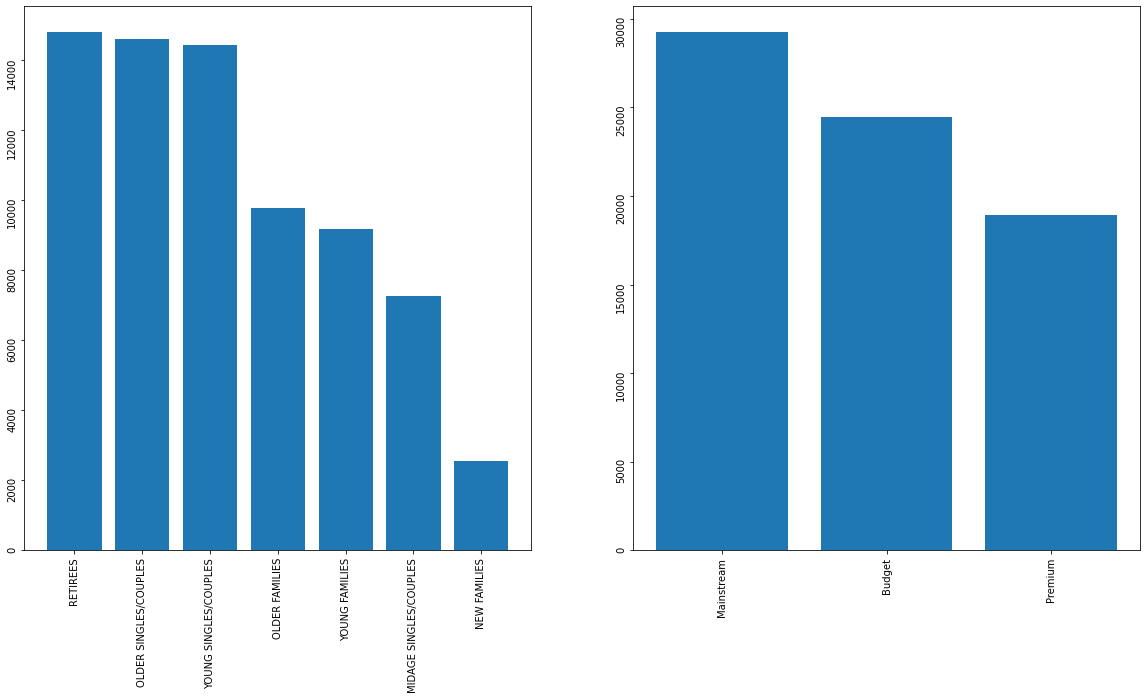

In [7]:
categorical_lifestage = pd.Categorical(trends_data.LIFESTAGE)
categorical_lifestage.describe()
plt.figure()

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,10))

ax[0].bar(trends_data.LIFESTAGE.value_counts().index,trends_data.LIFESTAGE.value_counts()) 
ax[0].tick_params(labelrotation=90)
ax[1].bar(trends_data.PREMIUM_CUSTOMER.value_counts().index,trends_data.PREMIUM_CUSTOMER.value_counts())
ax[1].tick_params(labelrotation = 90)
plt.show()


# trends_data.LIFESTAGE[categorical_lifestage[1]]


In [57]:
transaction_data = pd.read_excel(path_transaction, engine = 'openpyxl')
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [58]:
#checking whether there are any empty values
trends_data.isnull().sum().sum()
transaction_data.isnull().sum().sum()

0

0

In [74]:
merged_data = pd.merge(transaction_data,trends_data, how = "right",on = "LYLTY_CARD_NBR")
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43359,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,43531,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,43532,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,43406,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


In [75]:
#checking that all the customers have transaction records
merged_data.isnull().sum().sum()

#gettinig all the names of the products
unique_prod = merged_data["PROD_NAME"].unique()
unique_prod

0

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [76]:
split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()
split_prods

0                    [Natural, Chip, Compny, SeaSalt]
1             [Red, Rock, Deli, Chikn, Garlic, Aioli]
2                 [Grain, Waves, Sour, Cream, Chives]
3                 [Natural, ChipCo, Hony, Soy, Chckn]
4                      [WW, Original, Stacked, Chips]
                             ...                     
264831                  [Grain, Waves, Sweet, Chilli]
264832           [Kettle, Tortilla, ChpsFeta, Garlic]
264833            [Tyrrells, Crisps, Lightly, Salted]
264834    [Old, El, Paso, Salsa, Dip, Chnky, Tom, Ht]
264835        [Smiths, Crinkle, Chips, Salt, Vinegar]
Name: PROD_NAME, Length: 264836, dtype: object

In [77]:
#changing date time format
from datetime import date, timedelta
start = date(1899,12,30)

merged_data["DATE"] = merged_data["DATE"].apply(lambda x: timedelta(x)+start)
merged_data["DATE"] = merged_data["DATE"].apply(lambda x: x.strftime("%x"))
# print(pd.to_datetime(merged_data["DATE"]))




In [78]:
merged_data["DATE"] = pd.to_datetime(merged_data["DATE"])
merged_data["DATE"]

0        2018-10-17
1        2018-09-16
2        2019-03-07
3        2019-03-08
4        2018-11-02
            ...    
264831   2018-12-08
264832   2018-10-01
264833   2018-10-24
264834   2018-10-27
264835   2018-12-14
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [103]:
# merged_data.sort_values(['DATE'])
# mer = merged_data.groupby(["PREMIUM_CUSTOMER"])
# merged_data["DATE"].index.dtype
group = merged_data.groupby(["STORE_NBR",pd.Grouper(key = "DATE", freq = "1W")]).sum()

group[1][1]

# merged_data["DATE"].map(type) == type(merged_data["DATE"][0])
# merged_data.groupby("STORE_NBR").head()

KeyError: ignored

In [34]:
df = pd.DataFrame(

   {

       "Publish date": [

            "2000-01-02",

            "2000-01-02",

            "2000-01-09",

            "2000-01-16"

        ],

        "ID": [0, 1, 2, 3],

        "Price": [10, 20, 30, 40]

    }

)

df["Publish date"] = pd.to_datetime(df["Publish date"])


In [35]:
type(df["Publish date"][1])


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df["Publish date"][2]
df.groupby(pd.Grouper(key="Publish date", freq="1W")).mean()

Timestamp('2000-01-09 00:00:00')

,ID,Price
Publish date,,
2000-01-02,0.5,15.0
2000-01-09,2.0,30.0
2000-01-16,3.0,40.0
